In [181]:
from string import punctuation
import numpy as np
import pandas as pd
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

In [78]:
import spacy
nlp = spacy.load('en')

In [130]:
def read_text(filename):
    text = []
    with open(filename) as f:
        for line in f:
            line = line.replace('\n', ' ')
            text.append(unicode(line))
            
    return ''.join(text)

In [132]:
text = read_text('speech_text.txt')
df = pd.DataFrame([text])
df.columns = ['text']

In [133]:
df

,text
0,"Chief Justice Roberts, President Carter, Presi..."


In [134]:
x = nlp(df['text'][0].strip(punctuation))

In [135]:
list(x.ents)

[Carter,
 Clinton,
 Bush,
 Obama,
 Americans,
 America,
 America,
 years,
 Every four years,
 Obama,
 First,
 Michelle Obama,
 Today,
 today,
 Washington,
 D.C.,
 American,
 Capital,
 Washington,
 today,
 America,
 the United States of America,
 January 20th 2017,
 the day,
 tens of millions,
 Americans,
 American,
 one,
 one,
 one,
 today,
 Americans,
 American,
 trillions of dollars,
 America,
 One,
 millions,
 millions,
 American,
 today,
 this day,
 America First,
 American,
 American,
 America,
 American,
 American,
 two,
 American,
 American,
 first,
 Islamic,
 Earth,
 the United States of America,
 Bible,
 America,
 America,
 America,
 America,
 Earth,
 tomorrow,
 American,
 Detroit,
 Nebraska,
 Creator,
 Americans,
 American,
 America,
 America,
 America,
 America,
 God,
 God,
 America]

In [136]:
nlp_lst = [(tok.lemma_, tok.pos_) for tok in x if tok.pos_ != 'PUNCT' and tok.lemma_ not in list(ENGLISH_STOP_WORDS)]

In [137]:
lemma = []
pos = set()
for tup in nlp_lst:
    lemma.append(tup[0])
    pos.add(tup[1])
    

In [138]:
print lemma
pos

[u'chief', u'justice', u'roberts', u'president', u'carter', u'president', u'clinton', u'president', u'bush', u'president', u'obama', u'fellow', u'americans', u'people', u'world', u'thank', u'citizen', u'america', u'join', u'great', u'national', u'effort', u'rebuild', u'country', u'restore', u'promise', u'people', u'determine', u'course', u'america', u'world', u'year', u'come', u'face', u'challenge', u'confront', u'hardship', u'job', u'year', u'gather', u'step', u'carry', u'orderly', u'peaceful', u'transfer', u'power', u'grateful', u'president', u'obama', u'lady', u'michelle', u'obama', u'gracious', u'aid', u'transition', u'magnificent', u'today', u"'s", u'ceremony', u'special', u'meaning', u'today', u'merely', u'transfer', u'power', u'administration', u'party', u'transfer', u'power', u'washington', u'd.c.', u'american', u'people', u'word', u'past', u'inauguration', u'speech', u'library', u'long', u'small', u'group', u'nation', u"'s", u'capital', u'reap', u'reward', u'government', u'peo

{u'ADJ', u'ADP', u'ADV', u'INTJ', u'NOUN', u'NUM', u'PART', u'PROPN', u'VERB'}

In [139]:
def process_text(text_col):
    lemma_col = []
    pos_col = []
    ents_col = []
    for line in text_col:
        lemma_lst = []
        pos_set = set()
        x = nlp(line)
        ents_lst = list(x.ents)
        nlp_lst = [(tok.lemma_, tok.pos_) for tok in x \
                   if tok.pos_ != 'PUNCT' and tok.lemma_ not in list(ENGLISH_STOP_WORDS)]
        for lemma, pos in nlp_lst:
            lemma_lst.append(lemma)
            pos_set.add(pos)
        lemma_col.append(' '.join(lemma_lst))
        pos_col.append(pos_set)
        ents_col.append(ents_lst)
    return lemma_col, pos_col, ents_col
        

In [140]:
lemma, pos, ents = process_text(df['text'])

In [141]:
df['lemma'] = lemma
df['pos'] = pos
df['ents'] = ents

In [142]:
df

,text,lemma,pos,ents
0,"Chief Justice Roberts, President Carter, Presi...",chief justice roberts president carter preside...,"{ADV, NOUN, ADP, PROPN, INTJ, PART, NUM, ADJ, ...","[(Carter), (Clinton), (Bush), (Obama), (Americ..."


In [148]:
lemma = lemma[0].split()

In [175]:
word_freq = set([(word, lemma.count(word)) for word in lemma if word != "'s"])

In [176]:
word_freq

{(u"'", 1),
 (u'2017', 1),
 (u'20th', 1),
 (u'accept', 1),
 (u'action', 2),
 (u'administration', 1),
 (u'affair', 1),
 (u'aid', 1),
 (u'airport', 1),
 (u'allegiance', 2),
 (u'alliance', 1),
 (u'allow', 1),
 (u'almighty', 1),
 (u'america', 17),
 (u'american', 12),
 (u'americans', 4),
 (u'army', 1),
 (u'arrive', 1),
 (u'assemble', 1),
 (u'bear', 2),
 (u'beautiful', 1),
 (u'bedrock', 1),
 (u'belong', 2),
 (u'benefit', 1),
 (u'bible', 1),
 (u'big', 2),
 (u'birth', 1),
 (u'black', 1),
 (u'bleed', 1),
 (u'bless', 2),
 (u'blood', 1),
 (u'body', 1),
 (u'border', 3),
 (u'breath', 2),
 (u'bridge', 1),
 (u'bring', 4),
 (u'brown', 1),
 (u'build', 1),
 (u'bush', 1),
 (u'buy', 1),
 (u'capital', 3),
 (u'carnage', 1),
 (u'carry', 1),
 (u'carter', 1),
 (u'cash', 1),
 (u'celebrate', 2),
 (u'celebration', 1),
 (u'center', 1),
 (u'ceremony', 1),
 (u'challenge', 2),
 (u'change', 1),
 (u'chief', 1),
 (u'child', 3),
 (u'citizen', 4),
 (u'city', 3),
 (u'civilized', 1),
 (u'class', 1),
 (u'clinton', 1),
 (u'cl

In [177]:
word_freq = list(counts)
word_freq.sort(key=lambda x: x[1])

In [187]:
len(word_freq)

385

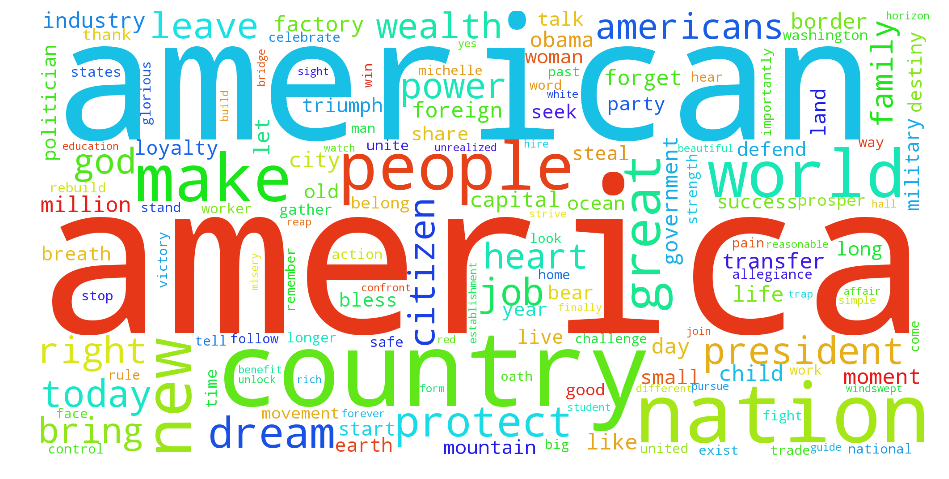

In [188]:
wc = WordCloud(width=2000, height=1000, max_words=150, background_color='white')
wc.fit_words(word_freq)
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.axis('off')
ax.imshow(wc)
plt.show()